# **Laboratorio 3 - Clasificador de zonas según el peligro**
Grupo 14: Noelia Cruz - Octavio Chañe - Diego Chañe 

Facultad de la Micro, Pequeña Y Mediana Empresa

Tecnicatura Universitaria en Tecnologías de Programación

Elementos de Aprendizaje de Máquina y Big Data

Universidad Provincial del Sudoeste - Noviembre 2023

# Importaciones

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import plotly.express as px  


# Declaraciones iniciales

## Variables globales

In [ ]:
# Se define el path del archivo
ruta_completa = './Crimenes.csv '


In [ ]:
# Se define los nombres de los estados abreviados
lista_estados_abrev = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
                          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
                          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
                          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
                          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [ ]:
# Se carga el archivo csv
df = pd.read_csv(ruta_completa)
# Se muestra informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado            50 non-null     object 
 1   Asesinatos        50 non-null     float64
 2   Asaltos           50 non-null     int64  
 3   Poblacion Urbana  50 non-null     int64  
 4   Violaciones       50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
# Se muestran datos
df.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
# Se arma un nuevo dataframe con los datos de interes
data = df[["Asesinatos", "Violaciones", "Asaltos", "Poblacion Urbana" ]]
data.head()

,Asesinatos,Violaciones,Asaltos,Poblacion Urbana
0,13.2,21.2,236,58
1,10.0,44.5,263,48
2,8.1,31.0,294,80
3,8.8,19.5,190,50
4,9.0,40.6,276,91


In [ ]:
# Se arma un nuevo dataframe con los datos de los estados
estados = df["Estado"]
estados.head()

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: Estado, dtype: object

# Modelo K-Means

## Función Método del codo

Se define esta función para poder elegir un k óptimo observando cómo cambia la inercia a medida que k aumenta y buscando un punto donde el descenso de la inercia se vuelva menos pronunciado.

In [ ]:
# Funcion definida en la clase teorica
def find_optimal_clusters_kmeans(data, max_k):
    sse = [] # sum of squared errors
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, n_init= 1).fit(data)
        sse.append(kmeans.inertia_)
    plt.plot(range(1, max_k+1), sse, 'o-')
    plt.xlabel("Número de clusters")
    plt.xticks(range(1, max_k+1))
    plt.ylabel("Suma de errores cuadrados SSE")
    plt.title("Elbow  Método para KMeans ")
    plt.show()


## Se llama a la función para analizar la gráfica 

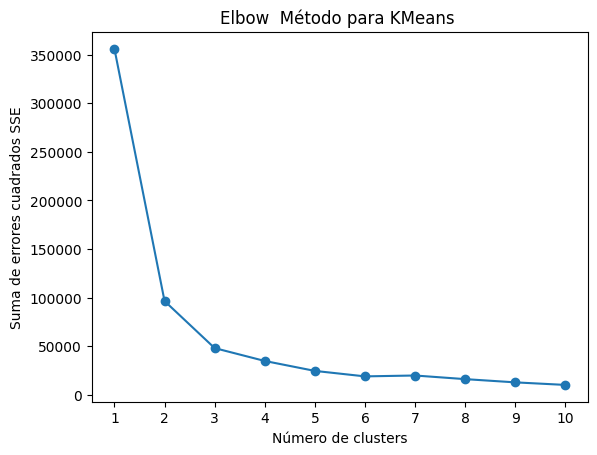

In [ ]:
find_optimal_clusters_kmeans(data, 10)   

Por lo que se ve en la imagen, el codo se ve cuando k = 3. Se aplica Kmeans con la cantidad de 3 clusters. n_clusters=3

## Se llama al método con n_cluster = 3

In [ ]:
# Se crea el modelo con 3 clusters
kmeans = KMeans(n_clusters=3, n_init= 1) 
# Se entrena el modelo con los datos
kmeans.fit(data)
# se obtienen las etiquetas de los clusters
clusters = kmeans.fit_predict(data)

In [ ]:
# Se muestra el resultado de los clusters
clusters

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0])

In [ ]:
# Se obtienen los tres centroides
centroids = kmeans.cluster_centers_
print(centroids)


[[  8.21428571  22.84285714 173.28571429  70.64285714]
 [  4.27        14.39        87.55        59.75      ]
 [ 11.8125      28.375      272.5625      68.3125    ]]


### Primer cluster (0)

In [ ]:
# Se obtienen las etiquetas de los clusters
# clusters == 0
clusters0 = data[clusters == 0]
clusters0.head()


,Asesinatos,Violaciones,Asaltos,Poblacion Urbana
3,8.8,19.5,190,50
5,7.9,38.7,204,78
9,17.4,25.8,211,60
20,4.4,16.3,149,85
24,9.0,28.2,178,70


In [ ]:
# Se obtinen los estados que pertenecen al cluster 0
estados0 = estados[clusters == 0]
estados0.head()

3          Arkansas
5          Colorado
9           Georgia
20    Massachusetts
24         Missouri
Name: Estado, dtype: object

### Segundo cluster (1)

In [ ]:
# clusters == 1
clusters1 = data[clusters == 1]
clusters1.head()


,Asesinatos,Violaciones,Asaltos,Poblacion Urbana
6,3.3,11.1,110,77
10,5.3,20.2,46,83
11,2.6,14.2,120,54
13,7.2,21.0,113,65
14,2.2,11.3,56,57


In [ ]:
# Se obtinen los estados que pertenecen al cluster 1
estados1 = estados[clusters == 1]
estados1.head()

6     Connecticut
10         Hawaii
11          Idaho
13        Indiana
14           Iowa
Name: Estado, dtype: object

### Tercer cluster (2)

In [ ]:
# clusters == 2
clusters2 = data[clusters == 2]
clusters2.head()

,Asesinatos,Violaciones,Asaltos,Poblacion Urbana
0,13.2,21.2,236,58
1,10.0,44.5,263,48
2,8.1,31.0,294,80
4,9.0,40.6,276,91
7,5.9,15.8,238,72


In [ ]:
# Se obtinen los estados que pertenecen al cluster 2
estados2 = estados[clusters == 2]
estados2.head()

0       Alabama
1        Alaska
2       Arizona
4    California
7      Delaware
Name: Estado, dtype: object

## Análisis Final

Teniendo en cuenta que en el conjunto de registros otorgado en el dataset importado:

● Asesinatos: La tasa de asesinatos, que se suele calcular como el número de asesinatos por cada 100,000 habitantes en el estado.

● Asaltos: La tasa de asaltos, que también se calcula por cada 100,000 habitantes. Esto incluiría casos de ataques violentos, incluyendo agresiones físicas.

● Población Urbana: El porcentaje de la población que vive en áreas urbanas del estado. Un número más alto indica una mayor concentración de población en las ciudades.

● Violaciónes: La tasa de violaciones, similarmente calculada por cada 100,000 habitantes. Representa la incidencia de este tipo de crimen en el estado. 

y observando los tres clusters obtenidos:


In [ ]:
clusters0

,Asesinatos,Violaciones,Asaltos,Poblacion Urbana
3,8.8,19.5,190,50
5,7.9,38.7,204,78
9,17.4,25.8,211,60
20,4.4,16.3,149,85
24,9.0,28.2,178,70
29,7.4,18.8,159,89
35,6.6,20.0,151,68
36,4.9,29.3,159,67
38,3.4,8.3,174,87
41,13.2,26.9,188,59


In [ ]:
clusters1

,Asesinatos,Violaciones,Asaltos,Poblacion Urbana
6,3.3,11.1,110,77
10,5.3,20.2,46,83
11,2.6,14.2,120,54
13,7.2,21.0,113,65
14,2.2,11.3,56,57
15,6.0,18.0,115,66
16,9.7,16.3,109,52
18,2.1,7.8,83,51
22,2.7,14.9,72,66
25,6.0,16.4,109,53


In [ ]:
clusters2

,Asesinatos,Violaciones,Asaltos,Poblacion Urbana
0,13.2,21.2,236,58
1,10.0,44.5,263,48
2,8.1,31.0,294,80
4,9.0,40.6,276,91
7,5.9,15.8,238,72
8,15.4,31.9,335,80
12,10.4,24.0,249,83
17,15.4,22.2,249,66
19,11.3,27.8,300,67
21,12.1,35.1,255,74


In [ ]:
# Se grafican los clusters con box
fig = px.box(clusters0, x=["Asesinatos","Violaciones","Asaltos"],
             points="all", title="Cluster 0",
             range_x=[0, 350]
             )
fig.show()

In [ ]:
# Se grafican los clusters con box
fig = px.box(clusters1, x=["Asesinatos","Violaciones","Asaltos"],
             points="all", title="Cluster 1",
             range_x=[0, 350])
fig.show()

In [ ]:
# Se grafican los clusters con box
fig = px.box(clusters2, x=["Asesinatos","Violaciones","Asaltos"],
             points="all", title="Cluster 1",
             range_x=[0, 350])
fig.show()

### Se realiza un gradico en 3D, en donde se analizan las tres tasas con el cluster que se les fue asignado.

In [ ]:
# Se crea el grafico de los clusters en 3D
fig=px.scatter_3d(data, x="Asesinatos", y="Violaciones", z="Asaltos", color=clusters,
                  template="plotly_dark", title="Clusters de Crimenes en Estados Unidos")   
fig.show()

### Se concluye que:

La zona de BAJA peligrosidad es la definida por el cluster1 (color rosa) compuesto por los estados:

In [ ]:
estados1

6       Connecticut
10           Hawaii
11            Idaho
13          Indiana
14             Iowa
15           Kansas
16         Kentucky
18            Maine
22        Minnesota
25          Montana
26         Nebraska
28    New Hampshire
33     North Dakota
34             Ohio
37     Pennsylvania
40     South Dakota
43             Utah
44          Vermont
47    West Virginia
48        Wisconsin
Name: Estado, dtype: object

La zona que tiene una peligrosidad MEDIA es la definida por el cluster0 (color azul), con los estados:

In [ ]:
estados0

3          Arkansas
5          Colorado
9           Georgia
20    Massachusetts
24         Missouri
29       New Jersey
35         Oklahoma
36           Oregon
38     Rhode Island
41        Tennessee
42            Texas
45         Virginia
46       Washington
49          Wyoming
Name: Estado, dtype: object

Y la zona de ALTA peligrosidad sería la definida por el cluster restante, el cluster2 (color amarillo):

In [ ]:
estados2

0            Alabama
1             Alaska
2            Arizona
4         California
7           Delaware
8            Florida
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27            Nevada
30        New Mexico
31          New York
32    North Carolina
39    South Carolina
Name: Estado, dtype: object

### Mapa USA

In [ ]:
# Se arma el dataframe para el grafico
df_grafico = pd.DataFrame(clusters)
df_grafico.columns = ['Peligrosidad']
df_grafico['estado'] = estados
df_grafico['estado_abrev'] = lista_estados_abrev


In [ ]:
# Se reemplazan los valores de los clusters por los nombres de los clusters
for i in range(0,3):
    if i == 0:
        df_grafico['Peligrosidad'] = df_grafico['Peligrosidad'].replace(i, 'Media')
    else:
        if i == 1:
            df_grafico['Peligrosidad'] = df_grafico['Peligrosidad'].replace(i, 'Baja')
        else:
            df_grafico['Peligrosidad'] = df_grafico['Peligrosidad'].replace(i, 'Alta')
df_grafico

,Peligrosidad,estado,estado_abrev
0,Alta,Alabama,AL
1,Alta,Alaska,AK
2,Alta,Arizona,AZ
3,Media,Arkansas,AR
4,Alta,California,CA
5,Media,Colorado,CO
6,Baja,Connecticut,CT
7,Alta,Delaware,DE
8,Alta,Florida,FL
9,Media,Georgia,GA


In [ ]:
# Se grafica el mapa
fig = px.choropleth(df_grafico, 
                    locations="estado_abrev", 
                    color="Peligrosidad",  
                    color_discrete_sequence=["red", "yellow", "green"], 
                    hover_name="estado", 
                    locationmode = 'USA-states',
                    template='plotly_dark'  ) 
fig.update_layout(
    title_text = 'Zonas de EE. UU. según su peligrosidad',
    geo_scope='usa')

fig.show()  